## Alunos

- Andreus Jartã Timm
- Kesley Jorge dos Santos
- Priscila Alvez Costa

#Lista 3
-------------


Objetivo: agrupar conjunto de observações de um banco de dados.

Banco utilizado: Wholesale customer

Descrição do dados:

1. FRESH: Gastos anuais (m.u.) em produtos frescos (Contínuo)
2. MILK: Gastos anuais (m.u.) em produtos lácteos (Contínuo)
3. GROCERY: Gastos anuais (m.u.) em produtos de mercearia (Contínuo)
4. FROZEN: Gastos anuais (m.u.) em produtos congelados (Contínuo)
5. DETERGENTS_PAPER: Gastos anuais (m.u.) em detergentes e produtos de papel (Contínuo)
6. DELICATESSEN: Gastos anuais (m.u.) em produtos de delicatessen (Contínuo)
7. CHANNEL: Canal dos clientes - Horeca (Hotel/Restaurante/Café) ou Varejo (Nominal)
8. REGION: Região dos clientes - Lisboa, Porto ou Outras (Nominal)

Exercício:

1. Carregamento e Análise Inicial:
* Carregue o banco de dados e analise suas features.
* Não utilize as variáveis Channel e Region.
* Realize a padronização dos dados.

**Observação**: Nos exercícios seguintes, utilize os dados padronizados.

2. Geração de Clusters:
* Gere 5 clusters utilizando os algoritmos K-means, Aglomerativo e DBSCAN (Utilize eps de 3000 e min_samples de 5).
3. Análise de Silhouette Score:
* Analise o resultado do Silhouette Score para cada agrupamento. Qual dentre os três é o melhor?

4. Decomposição de Componentes Principais (PCA):
* Realize a decomposição de componentes principais (PCA) com duas componentes.
* Qual o percentual da variabilidade é explicado com duas componentes?
* Construa um gráfico de pontos (scatterplot) onde no eixo x temos a primeira componente e no eixo y temos a segunda componente. Colora os pontos com o melhor cluster.

5. Método do Cotovelo (Elbow Method):
* Utilize o método do cotovelo junto com o algoritmo K-means para definir qual o melhor número de grupos.

## 1. Carga do banco
--------------------

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("../dataset/WholesaleCustomers.csv")

In [ ]:


# Visualizar as primeiras linhas
print(data.head())

# Remover variáveis categóricas (Channel e Region)
features = data.drop(columns=["Channel", "Region"])

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print(data.isnull().sum())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


## 2. Geração dos clusters
--------------------
## 2.1. KNN
--------------------

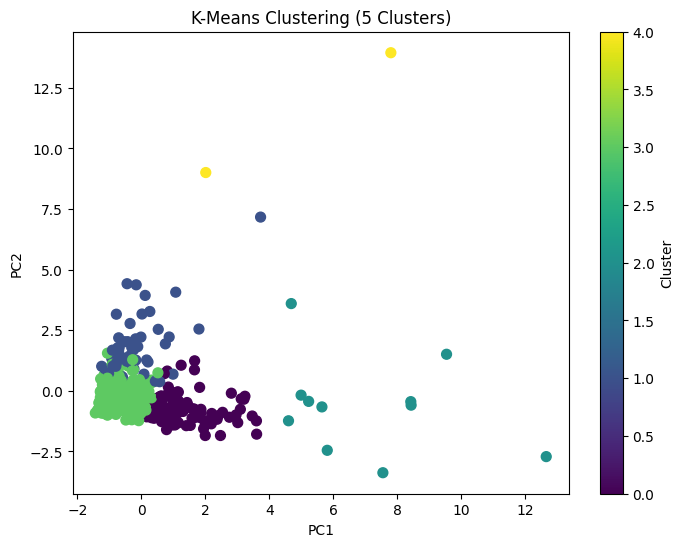

In [64]:

# K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering (5 Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

## 2.2. Aglomerativo
--------------------

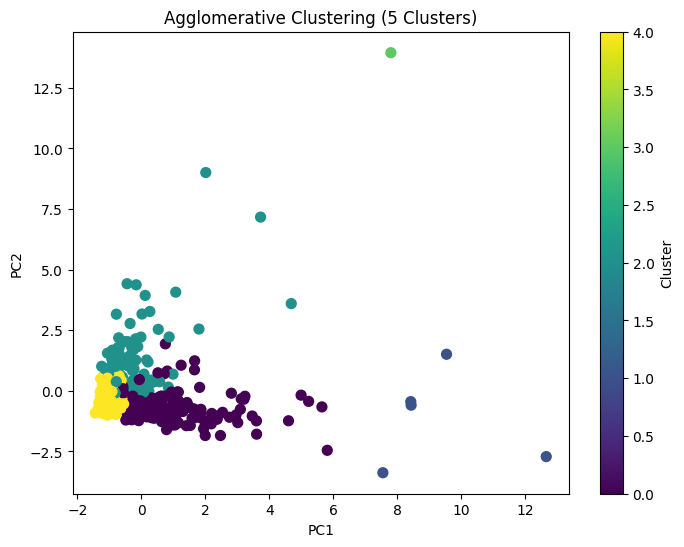

In [65]:
# Aglomerativo com 5 clusters
# Configuração do modelo Aglomerativo
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (5 Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

## 2.3. DBSCAN
--------------------

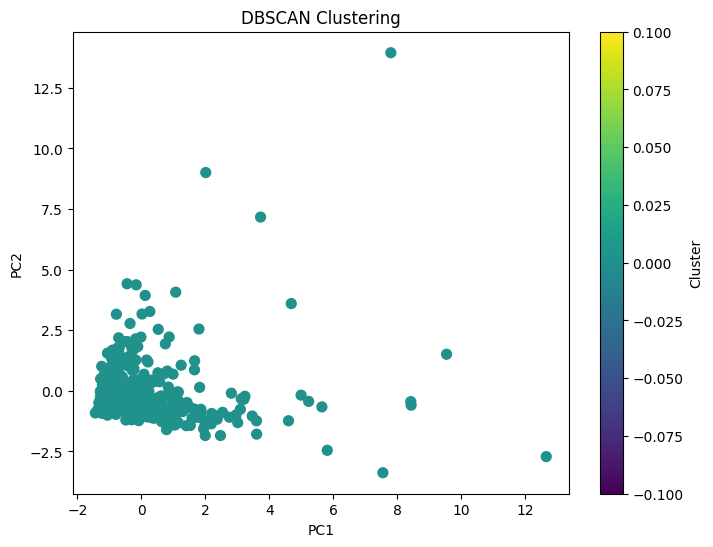

In [66]:
# DBSCAN com eps=3000 e min_samples=5
dbscan = DBSCAN(eps=3000, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

## 3 Análise sillhouete score
---------------------------

In [72]:
# Cálculo do Silhouette Score
print("Silhouette Score - K-Means:", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette Score - Aglomerativo:", silhouette_score(X_scaled, agglo_labels))

# DBSCAN pode gerar rótulos -1 para ruído; é necessário filtrar antes de calcular
if len(set(dbscan_labels)) > 1:
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = X_scaled[dbscan_labels != -1]
    print("Silhouette Score - DBSCAN:", silhouette_score(valid_data, valid_labels))
else:
    print("DBSCAN não gerou clusters suficientes para calcular o Silhouette Score.")

Silhouette Score - K-Means: 0.36890127429678043
Silhouette Score - Aglomerativo: 0.23988371669170097
DBSCAN não gerou clusters suficientes para calcular o Silhouette Score.


## 4. Visualização
---------------------------
## 4.1. PCA
---------------------------

In [76]:
# PCA com duas componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Percentual da variância explicada
print("Variância explicada pelas duas componentes:", pca.explained_variance_ratio_)

explained_variance = pca.explained_variance_ratio_.sum()
print(f"Variância explicada pelas duas componentes: {explained_variance:.2%}")


Variância explicada pelas duas componentes: [0.44082893 0.283764  ]
Variância explicada pelas duas componentes: 72.46%


## 4.2. Gráfico
---------------------------

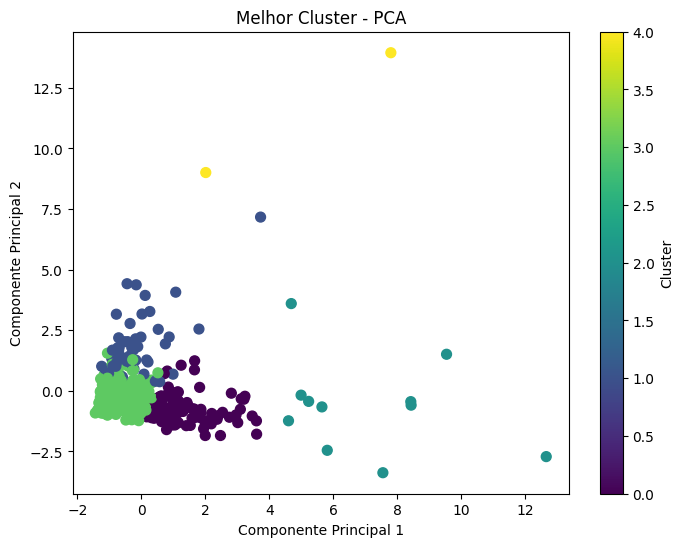

In [69]:
# Visualizar clusters com o melhor algoritmo (exemplo: K-Means)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Melhor Cluster - PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

## 5. Método elbow
---------------------------

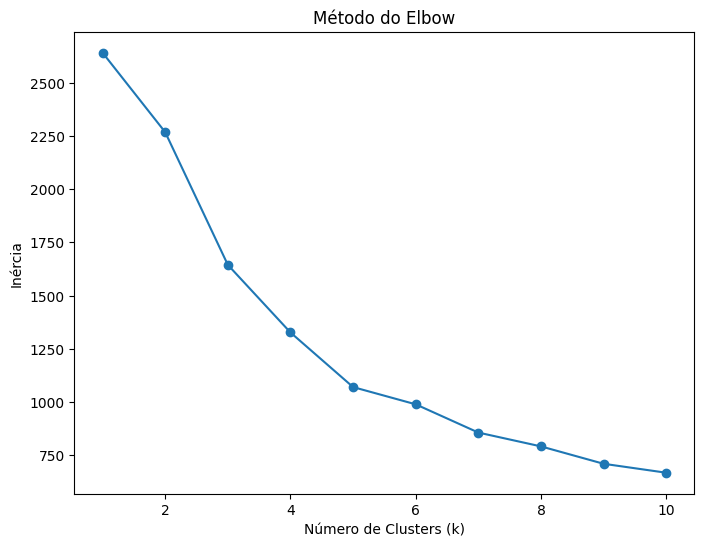

In [70]:
# Método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Elbow")
plt.show()